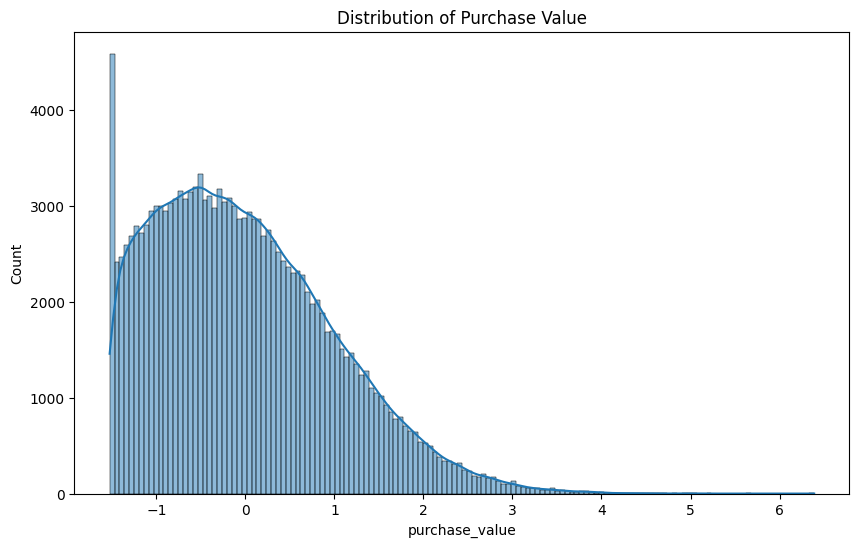

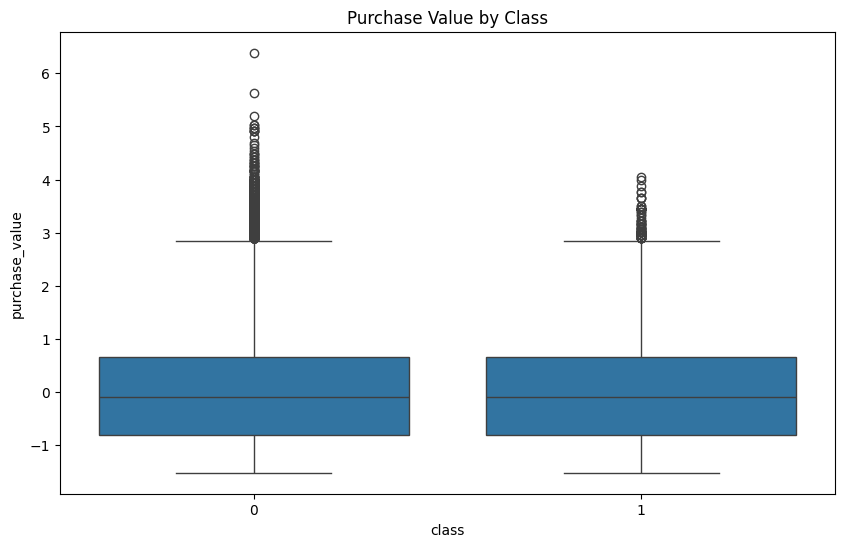

ValueError: 732758368.79972 does not appear to be an IPv4 or IPv6 address

In [4]:
# Modify the Python path to include the src directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import custom modules
from utils.utils import load_data, save_data
from data.data_preprocessing import DataPreprocessing
from data.data_merging import DataMerging

# Load the datasets
fraud_data = load_data('../data/raw/Fraud_Data.csv')
credit_card_data = load_data('../data/raw/creditcard.csv')
ip_address_data = load_data('../data/raw/IpAddress_to_Country.csv')

# Instantiate the DataPreprocessing class
dp_fraud = DataPreprocessing(fraud_data)
dp_credit = DataPreprocessing(credit_card_data)

# Handle missing values
dp_fraud.handle_missing_values(method='drop')
dp_credit.handle_missing_values(method='fill', fill_value=dp_credit.data.mean())

# Remove duplicates
dp_fraud.remove_duplicates()
dp_credit.remove_duplicates()

# Correct data types
dp_fraud.correct_data_types()

# Normalize and scale data
dp_fraud.normalize_and_scale(['purchase_value'])
dp_credit.normalize_and_scale(['Amount'])

# Save the processed data
save_data(dp_fraud.data, '../data/processed/processed_fraud_data.csv')
save_data(dp_credit.data, '../data/processed/processed_credit_card_data.csv')

# Exploratory Data Analysis (EDA)
# Univariate analysis for fraud_data
plt.figure(figsize=(10, 6))
sns.histplot(dp_fraud.data['purchase_value'], kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

# Bivariate analysis for fraud_data
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=dp_fraud.data)
plt.title('Purchase Value by Class')
plt.show()

# Merge datasets for geolocation analysis
dm = DataMerging(dp_fraud.data, ip_address_data)
fraud_data_int, ip_data_int = dm.convert_ip_to_int()
merged_data = dm.merge_datasets()

# Save merged data
save_data(merged_data, '../data/processed/processed_merged_data.csv')

# Display the first few rows of the merged data
merged_data.head()